In [40]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [41]:
from prophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [70]:
df_acum= pd.read_excel('df_copia_seguridad30-04-2022.xlsx')

In [71]:
df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)

df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')


In [72]:
df_acum

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417",1.799,No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389",1.869,No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667",1.809,No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694",1.769,No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
5,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1","-1,849833","39,000861",1.677,No disponible,No disponible,"1,757",No disponible,PLENOIL,L-D: 24H,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303075,ZARAGOZA,Zaragoza,VILLARRAPA,50692,"AUTOVIA A-68 KM. 258,25","-1,078944","41,740389",1.899,No disponible,"2,009","1,919","1,989",REPSOL,L-V: 05:00-22:00; S-D: 08:00-22:00,30-04-2022
303076,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"AVENIDA DIAGONAL PLAZA, 22","-0,990111","41,636528",1.919,No disponible,"2,058","1,949","2,009",REPSOL,L-V: 06:00-22:00; S: 08:00-15:00,30-04-2022
303079,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000",1.899,No disponible,"2,029","1,919","1,989",REPSOL,L-D: 06:00-22:00,30-04-2022
303080,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583",1.817,No disponible,No disponible,"1,828","1,868",COOPERATIVA SAN LICER,L-D: 24H,30-04-2022


In [73]:
df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
df_prophet_espana.columns = ['ds', 'y']
df_prophet_espana

,ds,y
0,04-04-2022,1.803
1,05-04-2022,1.799
2,09-04-2022,1.794
3,10-04-2022,1.789
4,11-04-2022,1.789
5,12-04-2022,1.789
6,14-04-2022,1.789
7,15-04-2022,1.799
8,16-04-2022,1.805
9,17-04-2022,1.809


In [74]:
#df_grafico[0]['Precio gasolina 95 E5'] = df_grafico[0]['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasóleo A'] = df_grafico[0]['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasolina 95 E5']=df_grafico[0]['Precio gasolina 95 E5'].astype('float64')
#df_grafico[0]['Precio gasóleo A']=df_grafico[0]['Precio gasóleo A'].astype('float64')

In [75]:
format_data = '%d-%m-%Y'
df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))


In [76]:
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      23 non-null     datetime64[ns]
 1   y       23 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 496.0 bytes


In [129]:
my_model = Prophet(interval_width=0.95, changepoint_prior_scale=0.5, daily_seasonality=False, yearly_seasonality=False)

In [130]:
my_model.fit(df_prophet_espana, iter=300)

2022-05-01 17:22:14.575 INFO    prophet: n_changepoints greater than number of observations. Using 17.


In [131]:
future = my_model.make_future_dataframe(periods=7)
future

,ds
0,2022-04-04
1,2022-04-05
2,2022-04-09
3,2022-04-10
4,2022-04-11
5,2022-04-12
6,2022-04-14
7,2022-04-15
8,2022-04-16
9,2022-04-17


In [132]:
 predict= my_model.predict(future)

In [133]:
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)

,ds,yhat,yhat_lower,yhat_upper
21,2022-04-29,1.854000,1.854000,1.854000
22,2022-04-30,1.865000,1.865000,1.865000
23,2022-05-01,1.865425,1.856330,1.874066
24,2022-05-02,1.862113,1.837045,1.887723
25,2022-05-03,1.862113,1.818441,1.906144
26,2022-05-04,1.852113,1.788314,1.914963
27,2022-05-05,1.862113,1.776489,1.945407
28,2022-05-06,1.877113,1.771282,1.989181
29,2022-05-07,1.888113,1.760737,2.031923


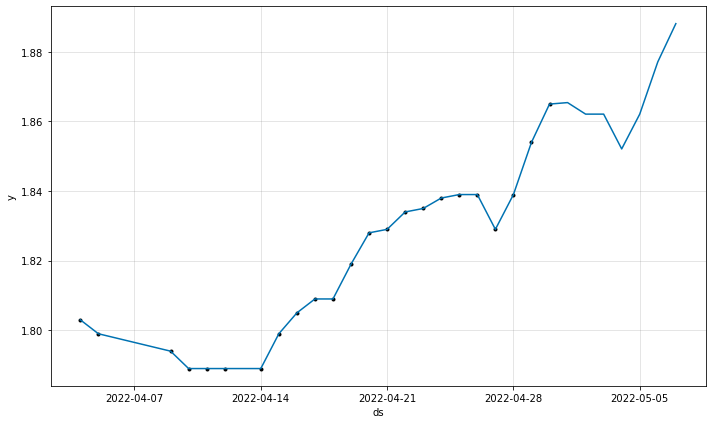

In [142]:
graph = my_model.plot(predict, uncertainty=False)
graph.savefig("aaa.jpg")


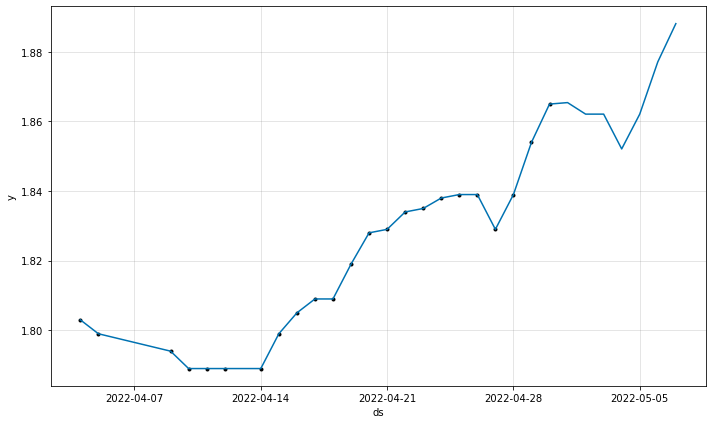

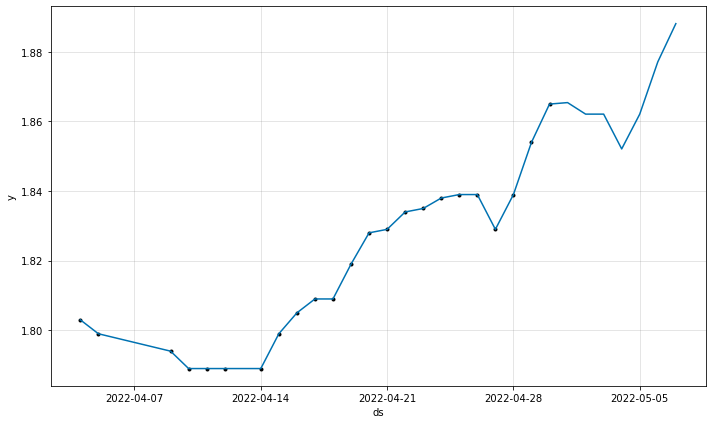

In [135]:
my_model.plot(predict, uncertainty=False)

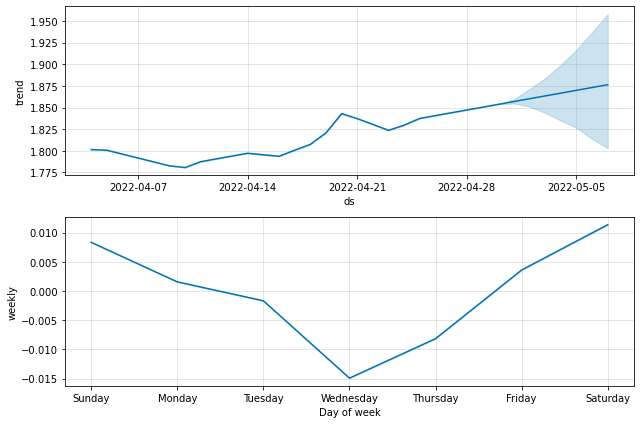

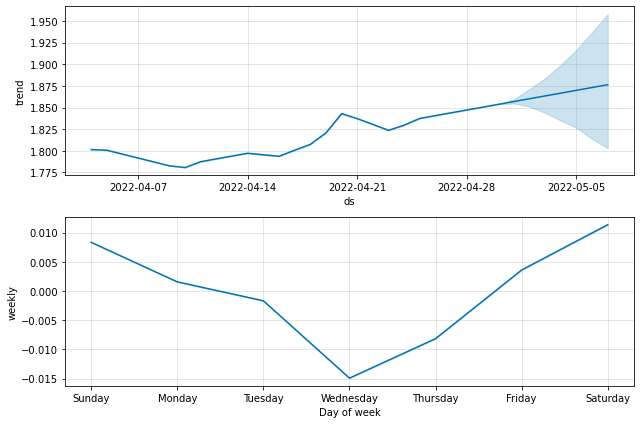

In [83]:
my_model.plot_components(predict)

In [84]:
df_acum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275342 entries, 0 to 303081
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Provincia                      275342 non-null  object 
 1   Municipio                      275342 non-null  object 
 2   Localidad                      275342 non-null  object 
 3   Código postal                  275342 non-null  int64  
 4   Dirección                      275342 non-null  object 
 5   Longitud                       275342 non-null  object 
 6   Latitud                        275342 non-null  object 
 7   Precio gasolina 95 E5          275342 non-null  float64
 8   Precio gasolina 95 E5 Premium  275342 non-null  object 
 9   Precio gasolina 98 E5          275342 non-null  object 
 10  Precio gasóleo A               275342 non-null  object 
 11  Precio gasóleo Premium         275342 non-null  object 
 12  Rótulo                        

## funciones pipeline

In [60]:
def prediction(df_acum):
    df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
    df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)
    df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')
    df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
    df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
    df_prophet_espana.columns = ['ds', 'y']
    format_data = '%d-%m-%Y'
    df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))
    my_model = Prophet(interval_width=0.8, daily_seasonality=False, yearly_seasonality=False)
    my_model.fit(df_prophet_espana, iter=100)
    future = my_model.make_future_dataframe(periods=7)
    predict= my_model.predict(future)
    predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)
    fig = my_model.plot(predict, uncertainty=False)
    fig.save('prediction.html')
    my_model.plot_components(predict)
    return fig
    

2022-05-01 17:06:42.531 INFO    prophet: n_changepoints greater than number of observations. Using 17.


NameError: name 'grap' is not defined

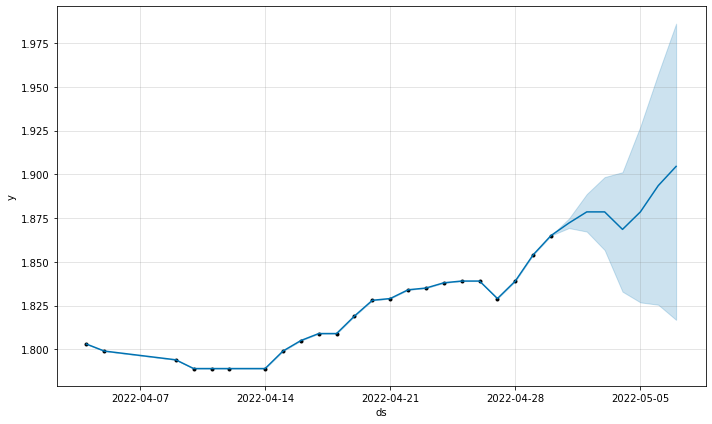

In [61]:
graph=prediction(df_acum)